In [14]:
import json, os, pandas as pd

SPLIT = "val"
ROOT = "/mnt/data/factcheck/averimatec/knowledge_store"

# path = /mnt/data/factcheck/averimatec/knowledge_store/val/text_related/image_related_store_text_val
path = os.path.join(ROOT, SPLIT, "text_related", "image_related_store_text_" + SPLIT)

In [16]:
len(sorted(os.listdir(path)))

152

In [30]:
print(sorted(os.listdir(path)))

['0.json', '1.json', '10.json', '100.json', '101.json', '102.json', '103.json', '104.json', '105.json', '106.json', '107.json', '108.json', '109.json', '11.json', '110.json', '111.json', '112.json', '113.json', '114.json', '115.json', '116.json', '117.json', '118.json', '119.json', '12.json', '120.json', '121.json', '122.json', '123.json', '124.json', '125.json', '126.json', '127.json', '128.json', '129.json', '13.json', '130.json', '131.json', '132.json', '133.json', '134.json', '135.json', '136.json', '137.json', '138.json', '139.json', '14.json', '140.json', '141.json', '142.json', '143.json', '144.json', '145.json', '146.json', '147.json', '148.json', '149.json', '15.json', '150.json', '151.json', '16.json', '17.json', '18.json', '19.json', '2.json', '20.json', '21.json', '22.json', '23.json', '24.json', '25.json', '26.json', '27.json', '28.json', '29.json', '3.json', '30.json', '31.json', '32.json', '33.json', '34.json', '35.json', '36.json', '37.json', '38.json', '39.json', '4.js

<Axes: >

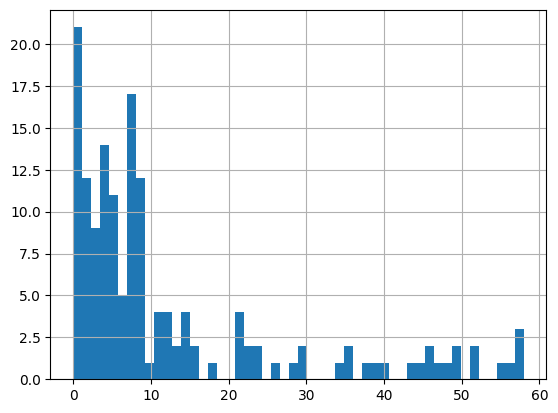

In [31]:
# show histogram of line numbers in image_related stuff

line_counts = []
image_related_gold = {}
for fname in sorted(os.listdir(path)):
    if not fname.endswith(".json"):
        continue
    fpath = os.path.join(path, fname)
    with open(fpath, "r") as f:
        lines = f.readlines()
        lines = [json.loads(l) for l in lines]
        lines = [line for line in lines if line["url2text"]]
        line_counts.append(len(lines))
        image_related_gold[int(fname.split(".")[0])] = lines
        
pd.Series(line_counts).hist(bins=50)

In [33]:
image_related_gold

{0: [{'claim_id': '0',
   'type': None,
   'url': 'https://abc13.com/101-year-old-great-grandmother-dies-after-viral-photo-great-grandma-holding-baby-rosa-camfield/596416/',
   'url2text': ['The 101-year-old woman who was subject of a touching viral photo passed away on March 30.',
    'Rosa Camfield was a teacher born on June 13, 1913, and lived much of her life in Michigan. Camfield was featured in a photograph holding her great-granddaughter.',
    "The photo was first posted on Facebook by Camfield's granddaughter Sarah Hamm, and was shocked to learn is had been shared by millions across the internet.",
    '"She passed away last night, so this was very bittersweet," Hamm, 33, told ABC News. "The photo was taken by me of my daughter Kaylee when she was 2 weeks old.',
    'It was actually the day she was being released in the hospital, so we were hoping that Grandma would get to meet her.',
    "Hamm first posted the photo on St. Patrick's Day of her grandmother holding her now 3-we

In [42]:
len(image_related_gold)

152

In [34]:
from firecrawl import Firecrawl
firecrawl = Firecrawl(api_key="fc-26cdd5077cb8451b94d1b27541d4b87d")

In [44]:
data = firecrawl.scrape(
    "https://www.alamy.com/vietnam-emperor-khai-dinh-8-october-1885-6-november-1925-12th-emperor-of-the-nguyen-dynasty-in-1916-emperor-khi-nh-was-the-12th-emperor-of-the-nguyn-dynasty-in-vietnam-his-name-at-birth-was-prince-nguyn-phc-bu-o-he-was-the-son-of-emperor-ng-khnh-but-he-did-not-succeed-him-immediately-he-reigned-only-nine-years-1916-1925-image344233306.html?imageid=D65F76D9-3C1A-4850-9256-6E7FBE8BC8E4&p=871016&pn=1&searchId=f21f14994cb24272c42f50b5b7f9d51d&searchtype=0",
    formats=["markdown", "summary", "images"],
)
data.metadata = dict(data.metadata)
data = dict(data)
data

{'markdown': "Hi there!\n\nLightboxes\n\nShare Alamy images with your team and customers\n\n- [Create a lightbox ›](https://www.alamy.com/lightbox/)\n\nAll images\n\n- All images\n\n- Photographs\n\n- Vectors\n\n- Illustrations\n\n- 360° images\n\n- Video\n\n- Live news\n\n\n* * *\n\n- Search by image\n\n\nSearch for imagesSearch for stock images, vectors and videos\n\nSearch with an image file or link to find similar images\n\n···\n\n# Vietnam: Emperor Khai Dinh (8 October 1885 - 6 November 1925), 12th emperor of the Nguyen Dynasty, in 1916. Emperor Khải Định was the 12th Emperor of the Nguyễn Dynasty in Vietnam. His name at birth was Prince Nguyễn Phúc Bửu Đảo. He was the son of Emperor Đồng Khánh, but he did not succeed him immediately. He reigned only nine years: 1916-1925.\n\nCaptions are provided by our contributors.\n\nRMID:Image ID:2B0152J\n\n[View related stock videos](https://www.alamy.com/stock-video/vietnam-emperor-khai-dinh.html)\n\n[Preview](https://www.alamy.com/aggregat